In [79]:
import numpy
import pandas
from pandas import DataFrame

# Цели работы:
1. Практика первичных навыков обработки данных: нормализация, One-Hot преобразование;
2. Сведение задачи классификации к задаче непараметрической регрессии;
3. Реализация решения задачи непараметрической регрессии ядерным сглаживанием Надарая Ватсона;
4. Практика наивного способа настройки и анализа гиперпараметров модели, решающей задачу непараметрической регрессии.

In [80]:
data = pandas.read_csv("dataset_191_wine.csv")
data

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Нормализация

In [81]:
from typing import List, Callable, Tuple


def my_minmax_normalization(x: List[float]) -> List[float]:
    x_max = numpy.max(x)
    x_min = numpy.min(x)
    return numpy.vectorize(lambda x_i: (x_i - x_min) / (x_max - x_min))(x)


def my_minmax(table: DataFrame) -> DataFrame:
    return table.apply(lambda column: my_minmax_normalization(column))


attributes = my_minmax(data.drop(columns=["class"]))
attributes

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


Питоновская нормализация

In [82]:
from sklearn import preprocessing

preprocessing.MinMaxScaler().fit_transform(data.drop(columns=["class"]))

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# One-Hot

In [83]:
def one_hot(categories: List[int]) -> List[List[int]]:
    maximum = numpy.max(categories)
    vectors = []
    for category in categories:
        vector = numpy.zeros(maximum).astype(int)
        vector[category - 1] = 1
        vectors.append(vector)
    return vectors


classes = one_hot(data["class"])
classes

[array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0

# Надарая-Ватсон

In [84]:
def Nadaraya_Watson(distance: Callable[[List[float], List[float]], float],
                    core: Callable[[float], float],
                    window: Callable[[List[float], int], float],
                    neighbours: int,
                    attrs: List[List[float]],
                    one_hots: List[List[int]],
                    given: List[float],
                    count: int) -> List[int]:
    candidates = [(distance(attrs[i], given), one_hots[i]) for i in range(len(attrs))]
    candidates = numpy.array(candidates,
                             dtype=type(candidates))
    candidates = candidates[candidates[:, 0].argsort()]
    result = numpy.zeros(count).astype(int)
    for i in range(neighbours):
        h = window(candidates[:, 0], neighbours)
        result = result + candidates[i][1] * core(candidates[i][0] / h)
    index = numpy.argmax(result)
    answer = numpy.zeros(count).astype(int)
    answer[index] = 1
    return answer


print("Test")
Nadaraya_Watson(lambda first, second: numpy.linalg.norm(first - second),
                lambda x: 1 / 2,
                lambda distance, neighbours: 0.1,
                100,
                attributes.loc[1:].to_numpy(),
                classes[1:],
                attributes.loc[0].to_numpy(),
                3)

Test


array([1, 0, 0])

# F-мера

In [85]:
def count_positive_negative(positive: int,
                            compare: List[Tuple[List[int], List[int]]]) -> List[int]:
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for (expected, actual) in compare:
        if expected[positive] == 1:
            if actual[positive] == 1:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if actual[positive] == 1:
                false_negative += 1
            else:
                true_negative += 1
    return [true_positive, true_negative, false_positive, false_negative]


def f_score(number: int,
            values: List[Tuple[List[int], List[int]]]):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for i in range(number):
        result = count_positive_negative(i, values)
        true_positive += result[0]
        true_negative += result[1]
        false_positive += result[2]
        false_negative += result[3]
    true_positive /= number
    true_negative /= number
    false_positive /= number
    false_negative /= number
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    return precision * recall / (precision + recall)

# Leave-One-Out

In [86]:
def leave_one_out(distance: Callable[[List[float], List[float]], float],
                  core: Callable[[float], float],
                  window: Callable[[List[float], int], float],
                  neighbours: int,
                  number: int) -> float:
    values = []
    for i in range(number):
        attrs = attributes.to_numpy()
        values.append((classes[i], Nadaraya_Watson(distance=distance,
                                         core=core,
                                         window=window,
                                         neighbours=neighbours,
                                         attrs=numpy.delete(arr=attrs, obj=i, axis=0),
                                         one_hots=numpy.delete(arr=classes, obj=i, axis=0),
                                         given=attrs[i],
                                         count=3)))
    return f_score(3, values)

# Оптимальные параметры

In [87]:
from math import sqrt
from scipy.spatial.distance import euclidean, cityblock, chebyshev

distances = {
    'euclidean': lambda first, second: euclidean(first, second),
    'cityblock': lambda first, second: cityblock(first, second),
    'chebyshev': lambda first, second: chebyshev(first, second)}
distances_names = ['euclidean', 'cityblock', 'chebyshev']

cores = {
    'uniform': lambda u: 1 / 2 if u <= 1 else 0,  # uniform
    'triangular': lambda u: (1 - abs(u)) if u <= 1 else 0,  # triangular
    'epanechnikov': lambda u: 3 / 4 * (1 - u ** 2) if u <= 1 else 0,  # epanechnikov
    'quartic': lambda u: 15 / 16 * (1 - u ** 2) ** 2 if u <= 1 else 0}  # quartic
cores_names = ['uniform', 'triangular', 'epanechnikov', 'quartic']


# windows = {
#     'depended': lambda distance, neighbours : distances[neighbours + 1],
#     'independent' :
# }
def fixed_window(distance_function: Callable[[List[float], List[float]], float],
                 coefficient: float) -> Callable[[List[float], int], float]:
    table = attributes.to_numpy()
    maximal = 0
    for i in range(table.shape[0]):
        for j in range(i + 1, table.shape[0]):
            maximal = max(maximal, distance_function(table[i], table[j]))
    return lambda distance, neighbours: coefficient * maximal

windows_names = ['dependent', 'fixed']

distance_answer = 'euclidean'
core_answer = 'uniform'
window_answer = 'dependent'
neighbours_answer = 1
coefficient_answer = 0
points = len(classes)
score = 0

for distance_name in distances_names:
    for core_name in cores_names:
        for window_name in windows_names:
            if window_name == 'dependent':
                for neighbour_number in range(1, int(sqrt(points) + 1)):
                    score_get = leave_one_out(distance=distances[distance_name],
                                              core=cores[core_name],
                                              window=lambda distance, neighbours: distance[neighbours + 1],
                                              neighbours=neighbour_number,
                                              number=points)
                    if score_get > score:
                        distance_answer = distance_name
                        core_answer = core_name
                        window_answer = 'dependent'
                        neighbours_answer = neighbour_number
                        score = score_get
            else:
                for coefficient_value in range(1, int(sqrt(points) + 1)):
                    score_get = leave_one_out(distance=distances[distance_name],
                                              core=cores[core_name],
                                              window=fixed_window(distances[distance_name],
                                                                  coefficient_value / sqrt(points)),
                                              neighbours=points - 1,
                                              number=points)
                    if score_get > score:
                        distance_answer = distance_name
                        core_answer = core_name
                        window_answer = 'fixed'
                        neighbours_answer = points - 1
                        coefficient_answer = coefficient_value / sqrt(points)
                        score = score_get
print(f'The best metric is {distance_answer}')
print(f'The best core type is {core_answer}')
print(f'The best window type is {window_answer}')
print(f'Number of neighbours is {neighbours_answer}')
print(f'Coefficient is {coefficient_answer}')
print(score)

The best metric is cityblock
The best core type is uniform
The best window type is dependent
Number of neighbours is 11
Coefficient is 0
0.49157303370786515


Лучшие гиперпараметры:
1. Метрика - Манхетонское расстояние
2. Ядро - равномерное распределение
3. Окно - зависимое от количества соседей
4. Количество соседей - 11

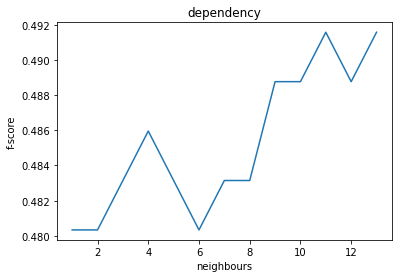

In [90]:
from matplotlib import pyplot as plt

plt.plot(numpy.arange(1, int(sqrt(points) + 1)), [leave_one_out(distance=distances[distance_answer],
                                                                core=cores[core_answer],
                                                                window=lambda distance, neighbours: distance[neighbours + 1],
                                                                neighbours=i,
                                                                number=points) for i in range(1, int(sqrt(points) + 1))])
plt.ylabel('f-score')
plt.xlabel('neighbours')
plt.title('dependency')
plt.show()